# Python _for fun and profit_

![Python España](static/python_es.png)

###### Juan Luis Cano Rodríguez
###### Madrid, 2016-05-13

## Outline

* Introduction
* Python for Data Science
* Python for IT
* General advice
* Conclusions

## Outline

* Introduction
* Python for Data Science

  * Interactive computation with Jupyter
  * Numerical analysis with NumPy, SciPy
  * Visualization with matplotlib and others
  * Data manipulation with pandas
  * Machine Learning with scikit-learn

* Python for IT

  * Data gathering with Requests and Scrapy
  * Information extraction with lxml, BeautifulSoup and others
  * User interfaces with PyQt, xlwings and others
  * Other: memcached, SOA

* General advice

  * Python packaging
  * The future of Python

* Conclusions

## `>>> print(self)`

<img src="static/pyconse.jpg" width="350px" style="float: right" />

* _Almost_ **Aerospace Engineer**
* Quant Developer for BBVA at Indizen
* Writer and furious tweeter at **Pybonacci**
* Chair ~~and BDFL~~ of **Python España** non-profit
* Co-creator and charismatic leader of **AeroPython** (\*not the Lorena Barba course)
* _When time permits (rare) [writes some open source Python code](https://github.com/Juanlu001/)_

## Python for Data Science

<img src="static/scipy_eco.png" width="350px" style="float: right" />

* **Python is a dynamic, interpreted\* language that is easy to learn**
* Very popular in science, research
* Rich ecosystem of packages that interoperate
* Multiple languages are used (FORTRAN, C/C++) and wrapped from Python for a convenient interface

### Jupyter

![Jupyter](static/jupyter_logo.png)

* **Interactive computation environment in a browser**
* Traces its roots to IPython, created in 2001
* Nowadays it's language-agnostic (**40 languages**)

Jupyter

* Notebook
* Exporting
* Interactive Widgets
* Slides
* Extensions https://github.com/ipython-contrib/IPython-notebook-extensions

It's a notebook!

* Code is computed in cells
* These can contain text, code, images, videos...
* All resulting plots can be integrated in the interface
* We can export it to different formats using `nbconvert` or from the UI

It's interactive!

In [30]:
from ipywidgets import interact, fixed

In [34]:
from sympy import init_printing, Symbol, Eq, factor
init_printing(use_latex=True)

x = Symbol('x')

def factorit(n):
    return Eq(x**n-1, factor(x**n-1))

In [35]:
interact(factorit, n=(2,40))

In [28]:
# Import matplotlib (plotting), skimage (image processing) and interact (user interfaces)
# This enables their use in the Notebook.
%matplotlib inline
from matplotlib import pyplot as plt

from skimage import data
from skimage.feature import blob_doh
from skimage.color import rgb2gray

# Extract the first 500px square of the Hubble Deep Field.
image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)

def plot_blobs(max_sigma=30, threshold=0.1, gray=False):
    """
    Plot the image and the blobs that have been found.
    """
    blobs = blob_doh(image_gray, max_sigma=max_sigma, threshold=threshold)
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_title('Galaxies in the Hubble Deep Field')
    
    if gray:
        ax.imshow(image_gray, interpolation='nearest', cmap='gray_r')
        circle_color = 'red'
    else:
        ax.imshow(image, interpolation='nearest')
        circle_color = 'yellow'
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=circle_color, linewidth=2, fill=False)
        ax.add_patch(c)

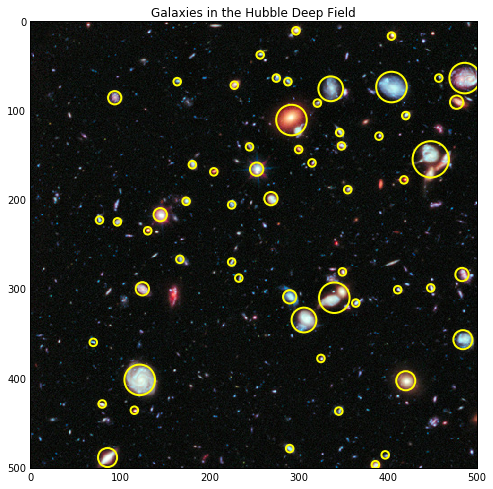

In [29]:
interact(plot_blobs, max_sigma=(10, 40, 2), threshold=(0.005, 0.02, 0.001))

It's highly extensible!

![Extensions](static/extensions.png)

* Some extensions https://github.com/ipython-contrib/IPython-notebook-extensions
* A thorough guide http://mindtrove.info/4-ways-to-extend-jupyter-notebook/

### NumPy

<img src="static/numpy.png" width="350px" style="float: right" />

* N-dimensional data structure.
* Homogeneously typed.
* Efficient!

A universal function (or ufunc for short) is a function that operates on ndarrays. It is a “vectorized function".

In [8]:
import numpy as np

In [9]:
my_list  = list(range(0,100000))
res1 = %timeit -o sum(my_list)

1000 loops, best of 3: 1.14 ms per loop


In [10]:
array = np.arange(0, 100000)
res2 = %timeit -o np.sum(array)

10000 loops, best of 3: 61.1 µs per loop


In [11]:
res1.best / res2.best

18.68618617922427

NumPy is much more:

<img src="static/broadcast_visual.png" width="350px" style="float: right" />

* Advanced manipulation tricks: broadcasting, fancy indexing
* Functions: generalized linear algebra, Fast Fourier transforms
* **Use case**:
  - In-memory, fits-in-my-computer, homogeneous data
  - Easily vectorized operations

## SciPy

<img src="static/scipy2016.png" width="350px" style="float: right" />

General purpose scientific computing library

* `scipy.linalg`: ATLAS LAPACK and BLAS libraries
* `scipy.stats`: distributions, statistical functions...
* `scipy.integrate`: integration of functions and ODEs
* `scipy.optimization`: local and global optimization, fitting, root finding...
* `scipy.interpolate`: interpolation, splines...
* `scipy.fftpack`: Fourier trasnforms
* `scipy.signal`: Signal processing
* `scipy.special`: Special functions
* `scipy.io`: Reading/Writing scientific formats

![Showcase](static/scipy_showcase.png)

## General advice

### Python packaging

Remember this picture? It's _so_ 2012!

![Comrades](static/python_comrades.png)

And by the way, a bit too optimistic:

* `setuptools` is back
* `easy_install` is not gone

![pip](static/pip_distribute.png)